In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [45]:
# default sns data set
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [47]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [48]:
df = df[df['species'] != 'setosa'] 

In [49]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [50]:
df['versicolor'] = df['species'].map({'versicolor' : 0 , 'virginica':1})

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


In [52]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [53]:
X

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [54]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: versicolor, Length: 100, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


X_train , X_test, y_train , y_test = train_test_split(X,y , test_size=0.25 , random_state=42) 

In [56]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

In [57]:
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [58]:
log_reg = LogisticRegression(max_iter=500)

In [59]:
pipeline = Pipeline([
    ('prep', preprocess),
    ('model', log_reg)
])

In [60]:
param_grid = {
    'model__solver': ['liblinear', 'saga'],       # these support l1 & elasticnet
    'model__penalty': ['l1', 'l2', 'elasticnet'], # valid penalties
    'model__C': [1, 10, 50 , 100 ,200 , 300 , 400,1000],
    'model__l1_ratio': [0.0, 0.5,0.6,0.7, 1.0]            # needed for elasticnet
}

In [61]:
c1_regression = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [62]:
# from sklearn.linear_model import LogisticRegression
# c1 = LogisticRegression()

In [63]:
# from sklearn.model_selection import GridSearchCV
# p1 = {'penalty' : ['l1','l2','elasticnet'],'C' : [1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,200,500,1000],'max_iter': [100,200,300]}

In [64]:
# c1_regression = GridSearchCV(c1,param_grid= p1,scoring='accuracy')

In [65]:
c1_regression.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

,estimator,Pipeline(step...x_iter=500))])
,param_grid,"{'model__C': [1, 10, ...], 'model__l1_ratio': [0.0, 0.5, ...], 'model__penalty': ['l1', 'l2', ...], 'model__solver': ['liblinear', 'saga']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [66]:
print(c1_regression.best_params_)

{'model__C': 1, 'model__l1_ratio': 0.0, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [67]:
print(c1_regression.best_score_)

1.0


In [68]:
y_pred=c1_regression.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score,classification_report

score=accuracy_score(y_pred,y_test)
print(score)

1.0


In [70]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



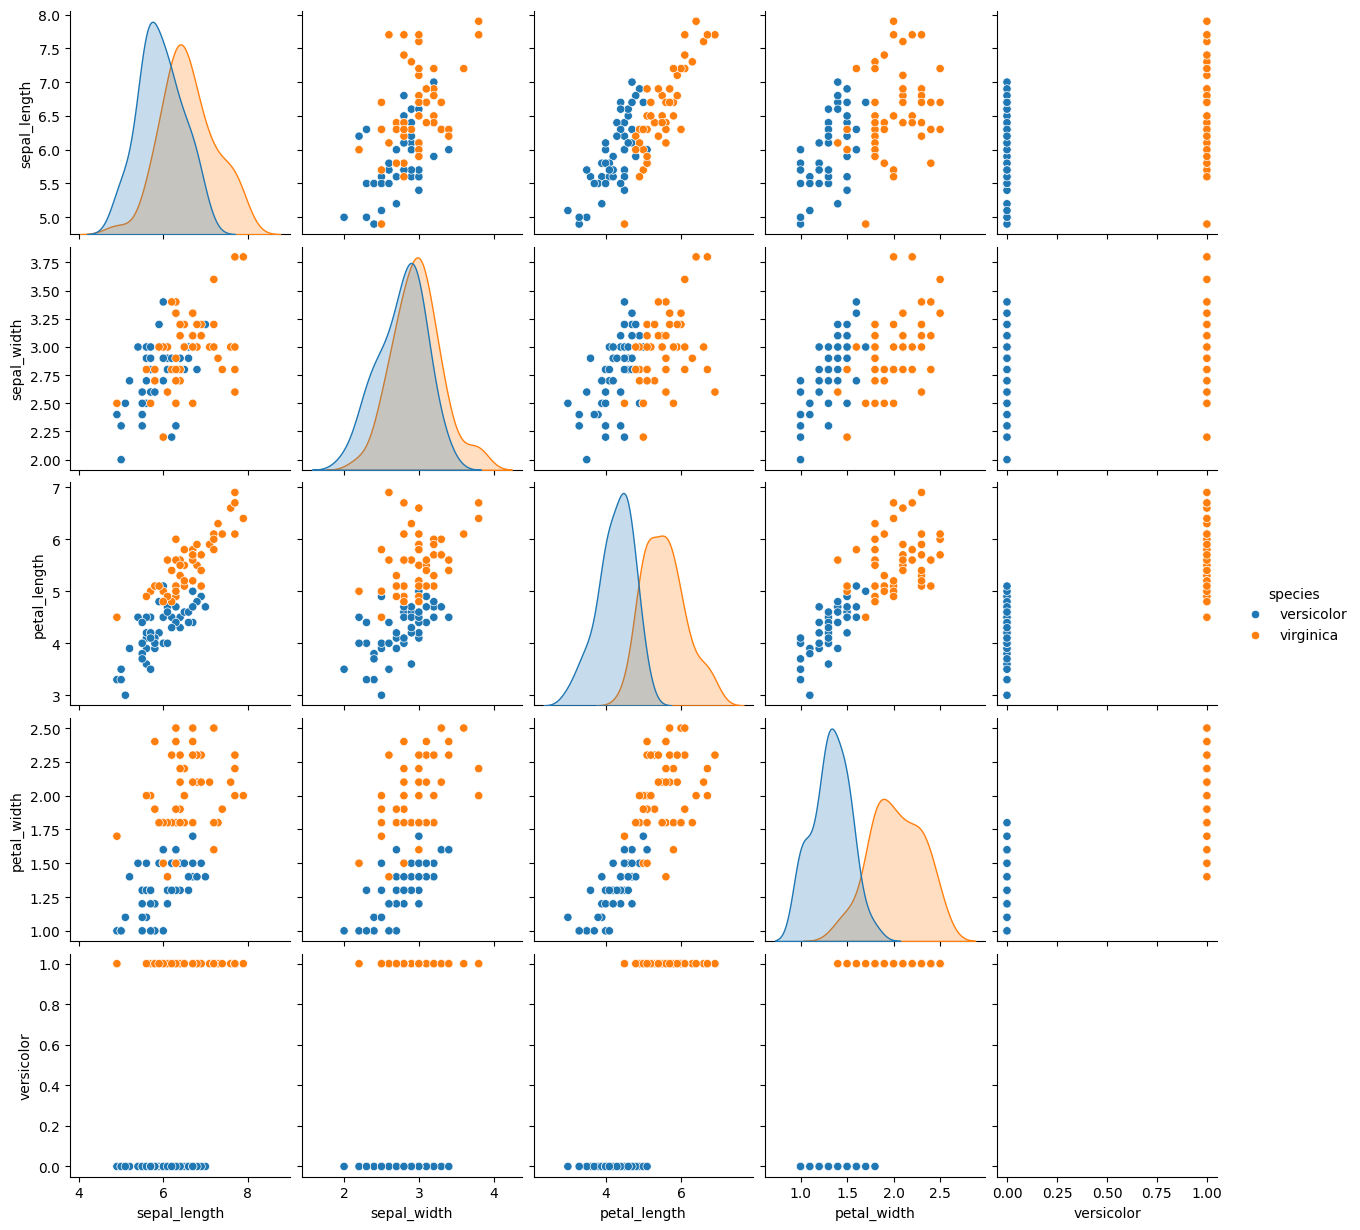

In [71]:
sns.pairplot(df,hue='species')